In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np

import torch

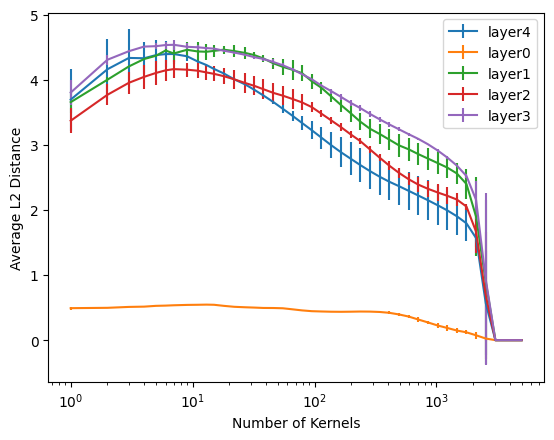

In [4]:
# [num_layers, #ks]
ks = torch.load("approx-output/ks_09.09-19:30.pt")
avg_l2_distances = torch.load("approx-output/avg_l2_distances_09.09-19:30.pt")
std_l2_distances = torch.load("approx-output/std_l2_distances_09.09-19:30.pt")
layers = ['layer4', 'layer0', 'layer1', 'layer2', 'layer3']

# Plot the average L2 distance for each layer
plt.figure()
for i, layer in enumerate(layers):
    plt.errorbar(ks, avg_l2_distances[i], yerr=std_l2_distances[i], label=layer)
plt.xlabel("Number of Kernels")
plt.ylabel("Average L2 Distance")
plt.xscale("log")
plt.legend()
plt.show()

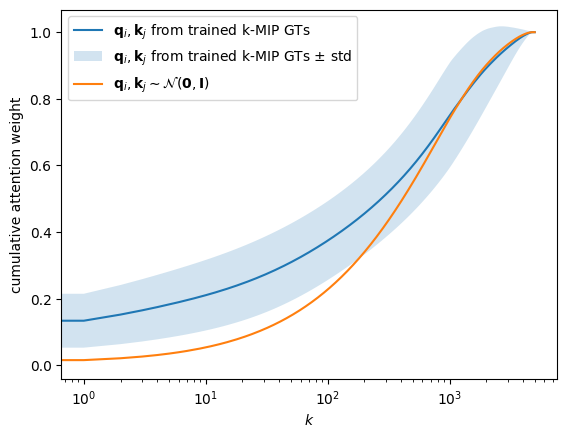

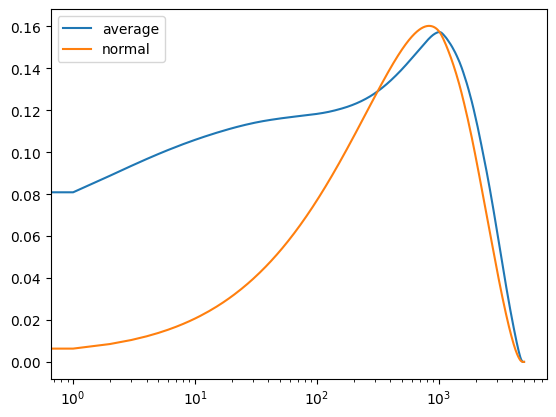

In [34]:
# [num_layers, maxN]
avg_attention_weights = torch.load("approx-output/avg_attention_weights_09.09-16:37.pt")
avg_attention_weights_normal = torch.load("approx-output/avg_attention_weights_normal_09.09-16:37.pt")
std_attention_weights = torch.load("approx-output/std_attention_weights_09.09-16:37.pt")
std_attention_weights_normal = torch.load("approx-output/std_attention_weights_normal_09.09-16:37.pt")
layers = ['layer4', 'layer0', 'layer1', 'layer2', 'layer3']

# average over layers
avg_avg_attention_weights = avg_attention_weights.mean(dim=0)
avg_std_attention_weights = 1/len(layers) * sum([std_attention_weights[i].pow(2) + (avg_attention_weights[i] - avg_avg_attention_weights).pow(2) for i in range(len(layers))])
avg_std_attention_weights = avg_std_attention_weights.sqrt()

fig = plt.figure()
# for layer_id, layer in enumerate(layers):
#     plt.plot(avg_attention_weights[layer_id], label=layer)
plt.plot(avg_avg_attention_weights, label='$\mathbf{q}_i, \mathbf{k}_j$ from trained k-MIP GTs')
plt.fill_between(range(len(avg_avg_attention_weights)), avg_avg_attention_weights - avg_std_attention_weights, avg_avg_attention_weights + avg_std_attention_weights, alpha=0.2, label='$\mathbf{q}_i, \mathbf{k}_j$ from trained k-MIP GTs $\pm$ std')
plt.plot(avg_attention_weights_normal[0], label='$\mathbf{q}_i, \mathbf{k}_j \sim \mathcal{N}(\mathbf{0}, \mathbf{I})$')
# plt.plot(avg_avg_attention_weights + avg_std_attention_weights, label='average + std', alpha=0.5, linestyle='--')
# plt.plot(avg_avg_attention_weights - avg_std_attention_weights, label='average - std', alpha=0.5, linestyle=':')
plt.xscale('log')
plt.xlabel('$k$')
plt.ylabel('cumulative attention weight')
plt.legend()
plt.show()

# fig = plt.figure()
# for layer_id, layer in enumerate(layers):
#     plt.plot(std_attention_weights[layer_id], label=layer)
plt.plot(avg_std_attention_weights, label='average')
plt.plot(std_attention_weights_normal[0], label='normal')
plt.xscale('log')
plt.legend()
plt.show()

In [2]:
sqrt10 = math.sqrt(10)
Ns = [1e2, sqrt10*1e2, 1e3, sqrt10*1e3, 1e4, sqrt10*1e4, 1e5, sqrt10*1e5, 1e6]
Ns = [int(N) for N in Ns]

full_gpu_times = [0.0003404140472412109, 0.00032873153686523436, 0.000518798828125, 0.003463411331176758, 0.01794719696044922, 0.8089216709136963, 9.26838846206665]
full_gpu_stds = [4.7710268257229055e-05, 6.7052867636026355e-06, 2.2541843089697326e-05, 0.0009716487453826032, 2.0372724588382277e-05, 0.0037786425366432845, 0.5181757686836302]

sparse_sym_gpu_times = [0.0019105434417724609, 0.004112052917480469, 0.0045852184295654295, 0.005144357681274414, 0.015179061889648437, 0.06019887924194336, 0.5016620635986329, 5.176379632949829, 49.213939380645755]
sparse_sym_gpu_stds = [0.0002096941268549189, 0.0010063554222916893, 0.0002404043659997121, 0.001013748307079294, 0.002073389862823691, 0.008905781618239163, 0.0019125115220665395, 0.6318142769816988, 1.427948661384903]

sparse_cpp_cpu_means = [-0.19739069938659667, 0.07884764671325684, 0.7681153297424317, 7.945254135131836, 79.19459619522095]
sparse_cpp_cpu_stds = [0.41891623963658686, 0.004060778485019169, 0.04926289838888981, 0.4416902276646358, 1.1751508660788474]

sparse_cpp_cpu_no_multithreading_means = [0.01338200569152832, 0.10632400512695313, 0.9107712268829345, 8.852263116836548, 85.67366256713868]
sparse_cpp_cpu_no_multithreading_stds = [0.00036449497248792974, 0.004335453657366296, 0.04631188387016763, 0.4860966731995662, 2.630794046597225]

full_cpu_means = [0.00028219223022460935, 0.000673675537109375, 0.007011842727661133, 0.028162193298339844, 0.24051947593688966]
full_cpu_stds = [8.885212716767153e-05, 0.0001817166663523741, 0.0013721296363329461, 0.0024937090610225345, 0.008956322688605503]

faiss_means = [0.38286805152893066, 0.47417411804199217, 0.5997219562530518, 0.3955562591552734, 0.3606912136077881, 0.36832318305969236, 0.5681795597076416, 2.6805231094360353, 21.994148015975952]
faiss_stds = [0.04085595282184075, 0.02683902020247728, 0.42036243516019883, 0.019751983500298262, 0.01955739694984158, 0.033038613081635484, 0.0371796493570227, 0.11343107059802439, 0.7149738263066265]

sparse_cpp_means_smaller_k = [0.011939477920532227, 0.04473023414611817, 0.1578599452972412, 0.4411372184753418, 1.5157017230987548, 6.640872049331665, 21.209903621673583]
sparse_cpp_stds_smaller_k = [0.0017100178531867958, 0.0022307140707177207, 0.0061532028923714606, 0.030472902551549615, 0.06486456187505042, 1.4756121584574005, 2.5145872316182563]

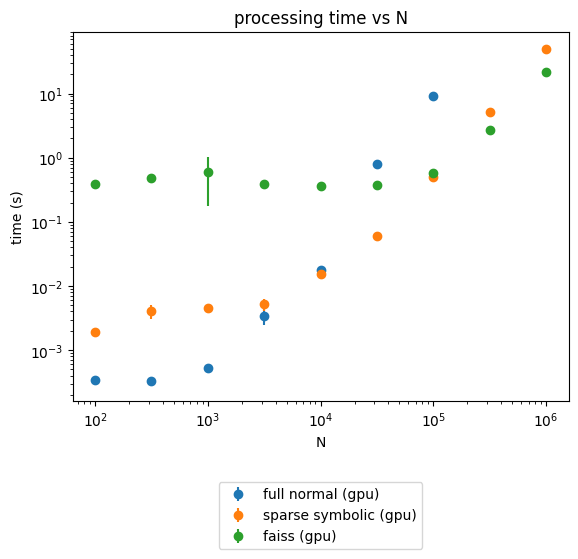

In [3]:
# plot all gpu times and stds on a single log plot, with error bars and Ns as the x-axis
plt.errorbar(Ns[:len(full_gpu_times)], full_gpu_times, yerr=full_gpu_stds, label="full normal (gpu)", fmt='o')
plt.errorbar(Ns[:len(sparse_sym_gpu_times)], sparse_sym_gpu_times, yerr=sparse_sym_gpu_stds, label="sparse symbolic (gpu)", fmt='o')
# plt.errorbar(Ns[:len(sparse_cpp_cpu_means)], sparse_cpp_cpu_means, yerr=sparse_cpp_cpu_stds, label="ball tree c++ extension (cpu)", fmt='o')
# plt.errorbar(Ns[:len(sparse_cpp_cpu_no_multithreading_means)], sparse_cpp_cpu_no_multithreading_means, yerr=sparse_cpp_cpu_no_multithreading_stds, label="c++ extension cpu no multithreading", fmt='o')
# plt.errorbar(Ns[:len(full_cpu_means)], full_cpu_means, yerr=full_cpu_stds, label="full cpu", fmt='o')
plt.errorbar(Ns[:len(faiss_means)], faiss_means, yerr=faiss_stds, label="faiss (gpu)", fmt='o')
# plt.errorbar(Ns[:len(sparse_cpp_means_smaller_k)], sparse_cpp_means_smaller_k, yerr=sparse_cpp_stds_smaller_k, label="c++ extension cpu smaller k", fmt='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('time (s)')
plt.title('processing time vs N')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=1)
plt.show()

In [44]:
# PLOTTING THE NUMBER OF NODES SEARCHED VS KQ_DIM

# python profiling-experiment.py --method sparse_cpp --kq_dim XX --maxN 1000000 --maxLeafSize 1

sqrt10 = math.sqrt(10)
Ns = [1e2, sqrt10*1e2, 1e3, sqrt10*1e3, 1e4, sqrt10*1e4, 1e5]
Ns = [int(N) for N in Ns]


kq1_keys_means = [10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]
kq1_keys_stds = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
kq1_nodes_means = [23.6, 23.8, 24.8, 24.4, 24.2, 25.6, 24.8]
kq1_nodes_stds = [0.4898979485566356, 0.39999999999999997, 0.39999999999999997, 0.4898979485566356, 0.7483314773547882, 1.0198039027185568, 0.39999999999999997]

kq2_time_means = [0.01855931282043457, 0.0578040599822998, 0.19132142066955565, 1.2181269168853759, 2.0907120227813722, 7.819151306152344, 23.94474067687988]
kq2_time_stds = [0.0005719051491519523, 0.0019476537818480684, 0.004645110103975378, 1.1620141249791194, 0.05980762453609267, 1.1393194215423306, 1.8921370793115677]
kq2_keys_means = [14.6, 15.2, 16.0, 17.0, 18.2, 19.2, 19.6]
kq2_keys_stds = [1.3564659966250536, 0.7483314773547882, 0.8944271909999159, 1.2649110640673518, 0.7483314773547882, 0.9797958971132713, 1.019803902718557]
kq2_nodes_means = [40.2, 44.6, 49.4, 53.2, 58.2, 62.6, 63.8]
kq2_nodes_stds = [3.7094473981982814, 1.8547236990991407, 2.0591260281974, 2.5612496949731396, 2.6381811916545836, 2.4166091947189146, 2.5612496949731396]

kq3_time_means = [0.020816278457641602, 0.07958173751831055, 0.25648913383483884, 0.9016017913818359, 3.6180064201354982, 12.502029848098754, 40.65799570083618]
kq3_time_stds = [0.0004307646810413382, 0.0020193577764189012, 0.005316734834850611, 0.013720640400944091, 1.1528000423953815, 2.002716723620144, 2.9131601034235217]
kq3_keys_means = [16.8, 20.2, 21.2, 23.4, 25.0, 27.4, 29.8]
kq3_keys_stds = [0.39999999999999997, 0.7483314773547882, 0.39999999999999997, 0.7999999999999999, 0.0, 1.624807680927192, 1.9390719429665317]
kq3_nodes_means = [51.6, 70.4, 82.0, 94.0, 107.0, 121.8, 135.4]
kq3_nodes_stds = [1.3564659966250538, 3.3823069050575527, 1.4142135623730951, 1.0954451150103321, 1.0954451150103321, 5.775811631277461, 9.112628599915613]

kq4_time_means = [0.0236055850982666, 0.08888335227966308, 0.3403312206268311, 1.2534770965576172, 5.118876266479492, 17.373872995376587, 57.87158536911011]
kq4_time_stds = [0.0007788581422717765, 0.002934835602016111, 0.01726241041188491, 0.02557689636411758, 1.316840676033847, 1.8166508328228936, 1.7117790487843947]
kq4_keys_means = [19.2, 23.6, 27.2, 29.4, 31.0, 34.8, 35.0]
kq4_keys_stds = [0.7483314773547882, 1.624807680927192, 1.7204650534085253, 0.4898979485566356, 1.0954451150103321, 2.227105745132009, 0.8944271909999159]
kq4_nodes_means = [65.4, 97.6, 130.8, 157.2, 182.6, 220.0, 237.0]
kq4_nodes_stds = [2.0591260281974, 6.086049621881176, 8.863407922464136, 4.445222154178573, 4.673328578219169, 13.069047402163633, 4.857983120596447]

kq5_time_means = [0.025959539413452148, 0.10631241798400878, 0.48655147552490235, 1.839021873474121, 7.477112865447998, 28.816003942489623, 105.15339612960815]
kq5_time_stds = [0.00034348065003801507, 0.0013843875966514992, 0.02270541104003664, 0.05781022557011969, 1.3678721947560692, 0.7966798220194912, 3.0908688664415696]
kq5_keys_means = [21.2, 25.8, 30.8, 34.0, 37.2, 41.2, 42.0]
kq5_keys_stds = [0.4, 0.4, 2.1354156504062622, 1.7888543819998317, 1.16619037896906, 1.7204650534085253, 0.6324555320336759]
kq5_nodes_means = [77.6, 121.2, 184.6, 240.2, 301.2, 376.2, 421.2]
kq5_nodes_stds = [1.7435595774162693, 1.8330302779823358, 12.483589227461788, 10.419213022104884, 4.915282290977803, 15.26302722267113, 10.186265262597475]

kq10_time_means = [0.030556964874267577, 0.16104474067687988, 0.9392069816589356, 5.84251070022583, 29.80623049736023, 161.7038046836853, 860.6894114017487]
kq10_time_stds = [0.00044793046622978376, 0.0032466680122453964, 0.0233176001905441, 1.2937856518993351, 1.5149854060789374, 9.690773378849238, 112.52558935959367]
kq10_keys_means = [25.8, 33.4, 42.2, 49.0, 55.0, 62.0, 68.0]
kq10_keys_stds = [0.9797958971132713, 0.4898979485566356, 1.9390719429665317, 1.6733200530681511, 2.0976176963403033, 3.1622776601683795, 2.280350850198276]
kq10_nodes_means = [107.8, 234.6, 486.8, 921.6, 1555.0, 2477.0, 3746.8]
kq10_nodes_stds = [1.16619037896906, 3.7202150475476548, 13.673331708109767, 25.016794358990122, 34.32783127434648, 102.39531239270673, 198.3788295156517]

kq15_time_means = [0.04936327934265137, 0.30126523971557617, 1.984482431411743, 10.149443864822388, 79.63648047447205, 501.9220682144165, 3065.126791763306]
kq15_time_stds = [0.00043564988399313296, 0.008460710442030887, 0.028742364762452982, 1.4901041249807108, 4.102687606078744, 5.78716581855404, 109.17067183943873]
kq15_keys_means = [26.6, 37.2, 47.2, 55.4, 68.0, 77.2, 85.0]
kq15_keys_stds = [0.4898979485566356, 1.7204650534085253, 2.2271057451320084, 0.7999999999999999, 4.049691346263317, 2.227105745132009, 5.253570214625479]
kq15_nodes_means = [119.2, 296.6, 722.0, 1644.4, 3636.8, 7293.2, 13709.2]
kq15_nodes_stds = [0.7483314773547882, 4.758150901348127, 9.011104260855047, 12.467557900406959, 111.0880731671947, 103.94883356728924, 531.0764163470263]

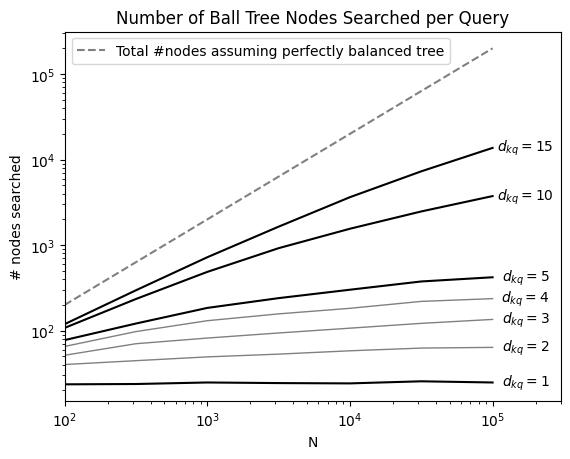

In [51]:
# PLOTTING THE NUMBER OF NODES SEARCHED VS N

plt.plot(Ns, kq1_nodes_means, color='black', linewidth=1.5)
plt.plot(Ns, kq2_nodes_means, color='gray', linewidth=1)
plt.plot(Ns, kq3_nodes_means, color='gray', linewidth=1)
plt.plot(Ns, kq4_nodes_means, color='gray', linewidth=1)
plt.plot(Ns, kq5_nodes_means, color='black', linewidth=1.5)
plt.plot(Ns, kq10_nodes_means, color='black', linewidth=1.5)
plt.plot(Ns, kq15_nodes_means, color='black', linewidth=1.5)

plt.plot(Ns, [2*N for N in Ns], linestyle='--', color='gray', label='Total #nodes assuming perfectly balanced tree')

plt.xlim(Ns[0], Ns[-1]*3)

# Add labels next to the lines
plt.text(Ns[-1]*1.7, kq1_nodes_means[-1], '$d_{kq}=1$', ha='center', va='center', fontweight='bold')
plt.text(Ns[-1]*1.7, kq2_nodes_means[-1], '$d_{kq}=2$', ha='center', va='center')
plt.text(Ns[-1]*1.7, kq3_nodes_means[-1], '$d_{kq}=3$', ha='center', va='center')
plt.text(Ns[-1]*1.7, kq4_nodes_means[-1], '$d_{kq}=4$', ha='center', va='center')
plt.text(Ns[-1]*1.7, kq5_nodes_means[-1], '$d_{kq}=5$', ha='center', va='center', fontweight='bold')
plt.text(Ns[-1]*1.7, kq10_nodes_means[-1], '$d_{kq}=10$', ha='center', va='center', fontweight='bold')
plt.text(Ns[-1]*1.7, kq15_nodes_means[-1], '$d_{kq}=15$', ha='center', va='center', fontweight='bold')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('# nodes searched')
plt.title('Number of Ball Tree Nodes Searched per Query')
plt.legend()
plt.show()

/tmp/ipykernel_201344/1931460407.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


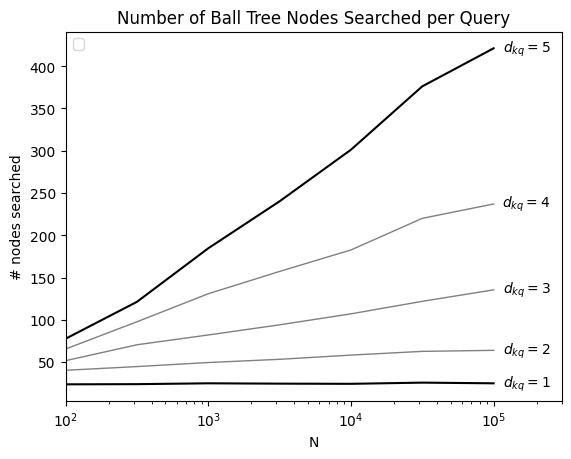

In [54]:
# PLOTTING THE NUMBER OF NODES SEARCHED VS N

plt.plot(Ns, kq1_nodes_means, color='black', linewidth=1.5)
plt.plot(Ns, kq2_nodes_means, color='gray', linewidth=1)
plt.plot(Ns, kq3_nodes_means, color='gray', linewidth=1)
plt.plot(Ns, kq4_nodes_means, color='gray', linewidth=1)
plt.plot(Ns, kq5_nodes_means, color='black', linewidth=1.5)
# plt.plot(Ns, kq10_nodes_means, color='black', linewidth=1.5)
# plt.plot(Ns, kq15_nodes_means, color='black', linewidth=1.5)

# plt.plot(Ns, [2*N for N in Ns], linestyle='--', color='gray', label='Total #nodes assuming perfectly balanced tree')

plt.xlim(Ns[0], Ns[-1]*3)

# Add labels next to the lines
plt.text(Ns[-1]*1.7, kq1_nodes_means[-1], '$d_{kq}=1$', ha='center', va='center', fontweight='bold')
plt.text(Ns[-1]*1.7, kq2_nodes_means[-1], '$d_{kq}=2$', ha='center', va='center')
plt.text(Ns[-1]*1.7, kq3_nodes_means[-1], '$d_{kq}=3$', ha='center', va='center')
plt.text(Ns[-1]*1.7, kq4_nodes_means[-1], '$d_{kq}=4$', ha='center', va='center')
plt.text(Ns[-1]*1.7, kq5_nodes_means[-1], '$d_{kq}=5$', ha='center', va='center', fontweight='bold')
# plt.text(Ns[-1]*1.7, kq10_nodes_means[-1], '$d_{kq}=10$', ha='center', va='center', fontweight='bold')
# plt.text(Ns[-1]*1.7, kq15_nodes_means[-1], '$d_{kq}=15$', ha='center', va='center', fontweight='bold')

plt.xscale('log')
# plt.yscale('log')
plt.xlabel('N')
plt.ylabel('# nodes searched')
plt.title('Number of Ball Tree Nodes Searched per Query')
plt.legend()
plt.show()

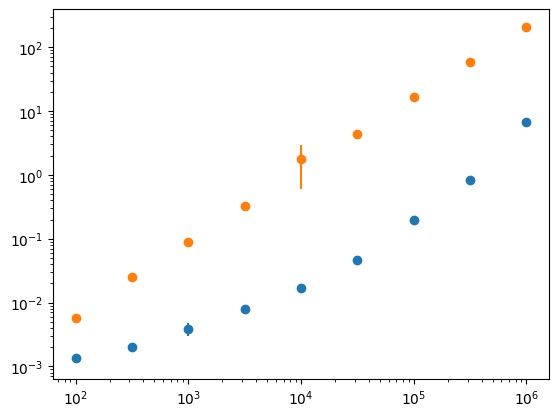

In [7]:
# PLOTTING THE EFFICIENCY OF SPARSE_SYMBOLIC VS SPARSE_CPP

sqrt10 = math.sqrt(10)
Ns = [1e2, sqrt10*1e2, 1e3, sqrt10*1e3, 1e4, sqrt10*1e4, 1e5, sqrt10*1e5, 1e6, sqrt10*1e6]
Ns = [int(N) for N in Ns]

sym_kq3_means = [0.001337432861328125, 0.0019960880279541017, 0.0038933753967285156, 0.007876968383789063, 0.017089366912841797, 0.04600358009338379, 0.19462780952453612, 0.8282591819763183, 6.631256008148194]
sym_kq3_stds = [0.00015910260405270957, 0.00027985236857625993, 0.0009471617776087101, 0.0005665052735299413, 0.0006280927031020573, 0.0019055452523682463, 0.02526175301816471, 0.04079756791052433, 1.0177108487741333]

cpp_kq3_means = [0.005819797515869141, 0.02500319480895996, 0.08819355964660644, 0.3226898193359375, 1.785881805419922, 4.355342102050781, 16.72867579460144, 58.301800441741946, 207.52339153289796]
cpp_kq3_stds = [0.0005436386542092856, 0.0013662773997036293, 0.0024549303970329947, 0.012476227515685705, 1.1895300519776781, 0.1516088748298022, 1.788928071840642, 1.8748678345748209, 8.11425699061844]

# fit a function x^a to the last three points of the sparse symbolic data
from scipy.optimize import curve_fit
def func(x, a):
    return x**a
popt, pcov = curve_fit(func, Ns[-3:], sym_kq3_means[-3:])

fig = plt.figure()
plt.errorbar(Ns[:len(sym_kq3_means)], sym_kq3_means, yerr=sym_kq3_stds, label="sparse symbolic (gpu)", fmt='o')
plt.errorbar(Ns[:len(cpp_kq3_means)], cpp_kq3_means, yerr=cpp_kq3_stds, label="sparse cpp (cpu)", fmt='o')
plt.plot(Ns, func(Ns[-3:], *popt), label='fit: $x^{%.2f}$' % tuple(popt))
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
# fit a function x^a to the last three points of the sparse symbolic data
from scipy.optimize import curve_fit

def func(x, a):
    return x**a

popt, pcov = curve_fit(func, Ns[-3:], sym_kq3_means[-3:])
print(popt)

# PLOTTING THE EFFICIENCY OF SPARSE_SYMBOLIC VS SPARSE_CPP

sqrt10 = math.sqrt(10)
Ns = [1e2, sqrt10*1e2, 1e3, sqrt10*1e3, 1e4, sqrt10*1e4, 1e5, sqrt10*1e5, 1e6, sqrt10*1e6]
Ns = [int(N) for N in Ns]

sym_kq3_means = [0.001337432861328125, 0.0019960880279541017, 0.0038933753967285156, 0.007876968383789063, 0.017089366912841797, 0.04600358009338379, 0.19462780952453612, 0.8282591819763183, 6.631256008148194]
sym_kq3_stds = [0.00015910260405270957, 0.00027985236857625993, 0.0009471617776087101, 0.0005665052735299413, 0.0006280927031020573, 0.0019055452523682463, 0.02526175301816471, 0.04079756791052433, 1.0177108487741333]

cpp_kq3_means = [0.005819797515869141, 0.02500319480895996, 0.08819355964660644, 0.3226898193359375, 1.785881805419922, 4.355342102050781, 16.72867579460144, 58.301800441741946, 207.52339153289796]
cpp_kq3_stds = [0.0005436386542092856, 0.0013662773997036293, 0.0024549303970329947, 0.012476227515685705, 1.1895300519776781, 0.1516088748298022, 1.788928071840642, 1.8748678345748209, 8.11425699061844]

fig = plt.figure()
plt.errorbar(Ns[:len(sym_kq3_means)], sym_kq3_means, yerr=sym_kq3_stds, label="sparse symbolic (gpu)", fmt='o')
plt.errorbar(Ns[:len(cpp_kq3_means)], cpp_kq3_means, yerr=cpp_kq3_stds, label="sparse cpp (cpu)", fmt='o')
plt.xscale('log')
plt.yscale('log')

# plot the fit
plt.plot(Ns[-3:], func(np.array(Ns[-3:]), *popt), label='fit: $x^{%.2f}$' % tuple(popt))



In [ ]:
# COMPARING THE EFFICIENCY OF sparse_symbolic AND faiss FOR VARIOUS kq_dim

# keep sym_kqX_means from previous experiment